---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [João Marcelo](https://https://www.linkedin.com/in/jo%C3%A3o-marcelo-fonseca-cunha-097776a2/)*  

---

# **Detecção de Fraude em Cartão de Crédito com Machine Learning**

# Metodologia CRISP-DM

Antes de iniciarmos o nosso projeto, pontuamos que as etapas da documentação do nosso trabalho seguem a [Metodologia CRISP-DM](https://www.knowsolution.com.br/voce-sabe-o-que-e-metodologia-crisp-dm-descubra-aqui/), seguindo, ainda que de forma não muito aprofundada, o fluxo abaixo. Vale a pena conferir este [artigo](https://medium.com/matgonz/crisp-dm-na-pr%C3%A1tica-65be0ee92ada), do Matheus Gonzalez, que aborda de forma prática cada etapa desssa metodologia. Inclusive, nos baseamos nele para documentar nosso projeto.

<p align=center>
<img src="https://upload.wikimedia.org/wikipedia/commons/b/b9/CRISP-DM_Process_Diagram.png" width="40%"></p>

# 1 - Entendimento do problema

A primeira etapa consiste na identificação das necessidades do nosso projeto. De forma resumida, é nessa etapa que fazemos a identificação do tema abordado, entendimento do processo, além de várias outras etapas de análise aprofundada do nosso problema. Ao fim dessa etapa devemos saber qual problema precisamos resolver e quais soluções hipotéticas para temos para que isso aconteça. Em nosso projeto, vamos abordar o problema das fraudes em cartões de crédito. 

## Detecção de fraudes em cartões de crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. 

<p align=center>
<img src="https://img.freepik.com/fotos-gratis/vista-frontal-do-hacker-masculino-segurando-o-smartphone-e-cartao-de-credito_23-2148578146.jpg?w=740&t=st=1671149152~exp=1671149752~hmac=66c09f6ee6b6c21dd376ae09ddf6c021f7716dbbbd6914e5e1fc6be4b334f37d" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Preparando o ambiente

Abaixo apresentamos a importação de alguns pacotes necessários em nossas análises. A importação dos pacotes do Scikit Learn será realizada de forma modular, à medida em que aplicarmos nossos modelos e análises.

In [ ]:
# desconsiderar os warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

In [ ]:
# importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

## configurar o estilo dos gráficos do Seaborn
## configurar os temas do seaborn / matplotlib

Abaixo vamos habilitar o Google Drive para carregar o nosso *dataset*.

In [ ]:
# habilitando google driver para carregar dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2 - Entendimento dos dados

Conforme documentado no [artigo](https://medium.com/matgonz/crisp-dm-na-pr%C3%A1tica-65be0ee92ada) supracitado, esta etapa consiste em coletar, organizar e documentar todos os dados que se encontram disponíveis para realizar a análise exploratória.Precisamos identificar os dados importantes para a resolução do problema, analisar a qualidade dos dados, realizar análise descritiva, identificar padrões, obter insights e formular hipóteses.

## Importando os dados


Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://img.freepik.com/fotos-gratis/close-de-cliente-pagando-com-cartao-de-credito_329181-2048.jpg?w=740&t=st=1671150117~exp=1671150717~hmac=c5b21af1ee483c65ae07968ed71e3e5cc6bc8a5b9432d4145a99490c02eada5b" width="60%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [ ]:
# importando os dados para a variável df
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine_learning/creditcard.csv')

In [ ]:
# verificando os 10 primeiros registros
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Dicionário dos dados**

|Coluna|Descrição|
|------|---------|
|Time|Número de segundos decorridos entre a transação do registro e a primeira transação no conjunto de dados|
|V1 - V28|Pode ser resultado de uma redução de dimensionalidade do PCA para proteger identidades de usuários e recursos confidenciais|
|Amount|Valor da transação|
|Class|1 para transações fraudulentas, 0 caso contrário|

Com os dados importados para dentro de uma estrutura Dataframe - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de Machine Learning.

## Análise exploratória

Apenas olhando as cinco primeiras entradas é possível tirar algumas conclusões:

* As 5 primeiras entradas permitem entender como a transformação PCA deixou as *features* descaracterizadas (anônimas) e em valores numéricos. Para saber mais sobre PCA, [clique neste *link*](http://www2.ic.uff.br/~aconci/PCA-ACP.pdf).

* As colunas `Time` e `Amount` foram preservadas, mantendo seu valor original.

* A variável alvo está representada na coluna `Class`, onde:
    * **0:** Transação normal; e
    * **1:** Transação fraudulenta;

In [ ]:
# verificando informações dos tipos das variáveis do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# verificando se existem dados nulos
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# verificando dimensão do dataset
print(f'Total de linhas:\t{df.shape[0]}')
print(f'Total de colunas:\t{df.shape[1]}')

Total de linhas:	284807
Total de colunas:	31


Observamos também que nosso dataset é composto por um total de 284.807 linhas, em que cada linha representa uma transação. O total de colunas, que são nossas variáveis,é de 31.

Além disso verificamos também que não existem dados nulos em nosso dataset e todas as variáveis de nossa base, com exceção da Class, estão em formato float. Class está represetada como tipo inteiro, compreendendo a variável alvo, onde 0 representa uma transação normal e 1 representa uma transação fraudulenta.

In [ ]:
# verificando a descrição estatística dos dados da variável amount
df.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Verificando acima o resumo estatístico do dataset, considerando a variável Amount. Nota-se que o valor médio de transações (considerando ambas as classes) é 88.34, mediana igual a 22.00 e desvio padrão de 250.12. Atingindo o valor máximo de 25691.16, a maioria das transações financeiras é composta em sua maioria por quantias menores.

In [ ]:
# verificando dimensão do dataset para dados de fraude
df_fraude = df.Amount[df.Class == 1]

print('Dados de não fraude')
print(f'Total de linhas:{df_fraude.shape[0]}')
print(f'% sobre o total do dataset:{(df_fraude.shape[0]/df.shape[0])*100:0.2f}%\n')

# verificando descrição estatística dos dados da variável amount para dados de fraude
df_fraude.describe()

Dados de não fraude
Total de linhas:492
% sobre o total do dataset:0.17%



count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Acima verificamos o resumo estatístico do dataset, considerando a variável Amount, apenas para a Classe 1, que representa fraude. Nota-se que o valor médio de transações é 122,21, quase 40% a mais que os dados de operações nao fraudulentas.A mediana igual a 9,25 e desvio padrão de 256.12. Atingindo o valor máximo de 2125,87. Portanto, se observa que a média dos valores de transações de fraude é maior que a média das transações normais. Cabe ressaltar a baixa representatividade desses dados de fraude no dataset, representando apenas 0,17%, conforme documentado mais detalhadamente abaixo.

In [ ]:
# verificando dimensão do dataset para dados de não fraude 
df_nao_fraude = df.Amount[df.Class == 0]

print('Dados de fraude')
print(f'Total de linhas:{df_nao_fraude.shape[0]}')
print(f'% sobre o total do dataset:{(df_nao_fraude.shape[0]/df.shape[0])*100:0.2f}%\n')

# verificando descrição estatística dos dados da variável amount para dados de não fraude
df_nao_fraude.describe()

Dados de fraude
Total de linhas:284315
% sobre o total do dataset:99.83%



count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Acima observamos o resumo estatístico das transações normais, ou seja, que não representam fraudes. Observamos que a média dos valores é de 88,29, a mediana é 22,00 e o valor máximo, assim como análise do dataset todo, é de 25.691,16.

Como é [informado na descrição dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), as entradas relativas à transações fraudulentas correspondem a 0,17% do total.

O gráfico de barras abaixo mostra como essa discrepância se torna nítida e visível. Na prática, isso interfere no desempenho do modelo, e será necessário fazer um balanceamento dos dados antes de alimentar o modelo final de classificação.

0    284315
1       492
Name: Class, dtype: int64

Fraudes representam 0.17%.



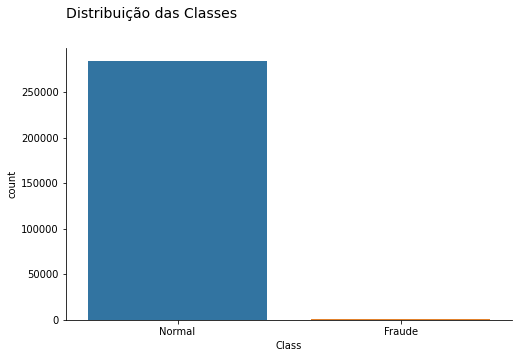

In [ ]:
# ver o balanceamento das classes
print(df.Class.value_counts())
print(f'\nFraudes representam {(df[df.Class == 1].shape[0] / df.shape[0])*100:0.2f}%.\n')

# plotar gráfico de barras para classes
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot('Class', data=df, ax=ax)
ax.set_title('Distribuição das Classes', loc='left', fontsize=14, pad=30)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(['Normal', 'Fraude'])
ax.grid(False)
plt.show();

Seguindo nossas análises, vamos poltar os boxplots para verificar se existe alguma diferença no padrão das transações em relação à dimensão `Amount`. De uma maneira geral, percebemos uma distribuição diferente para as duas classes, o que provavelmente pode contribuir para o treinamento do modelo de Machine Learning. Podemos observar destacado no boxplot a média que é maior nos dados de transações de fraude.

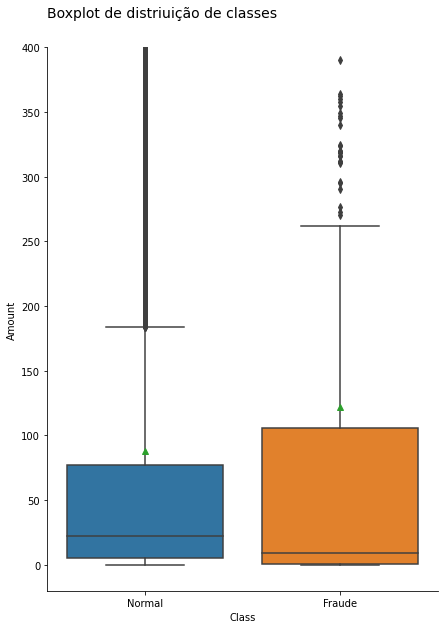

In [ ]:
fig, ax = plt.subplots(figsize=(7,10), sharex=True)

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax)
ax.set_title('Boxplot de distriuição de classes', loc='left', fontsize=14, pad=30)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)
ax.set_xticklabels(['Normal', 'Fraude'])
plt.ylim((-20, 400))
plt.show();

Agora vamos plotar um histograma das transações por classe, considerando a evolução dessas movimentações na variável time. Ou seja, um histograma de transações no tempo informado no dataset.

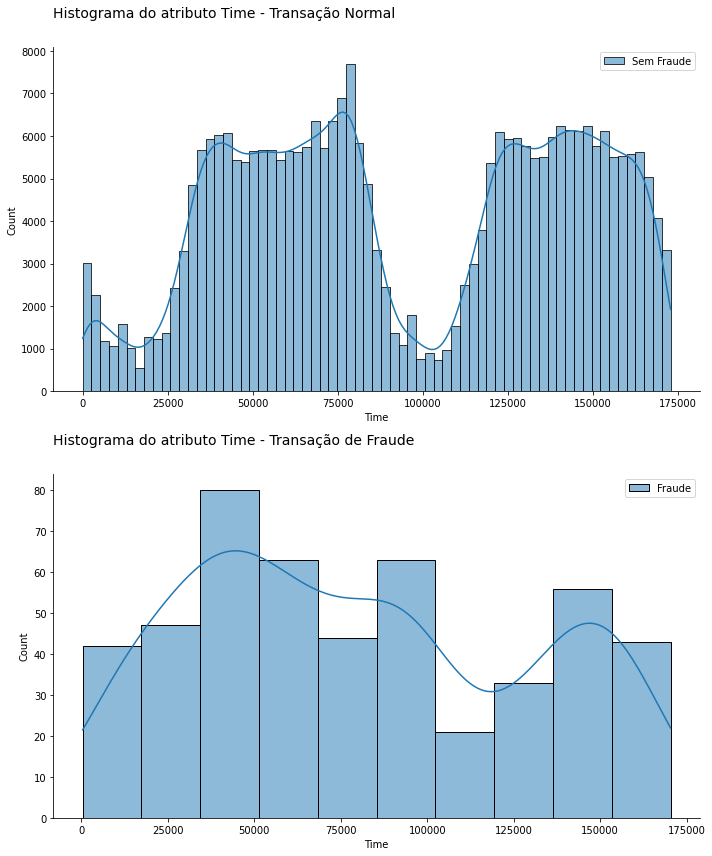

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10,12))

#setar cor
ax0 = sns.histplot(data=df[df.Class == 0].Time, ax=ax0, label='Sem Fraude', kde=True)
ax0.set_title('Histograma do atributo Time - Transação Normal', loc='left', fontsize=14, pad=30)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.grid(False)
ax0.legend()
plt.tight_layout()

ax1 = sns.histplot(data=df[df.Class == 1].Time, ax=ax1, label='Fraude', kde=True)
ax1.set_title('Histograma do atributo Time - Transação de Fraude', loc='left', fontsize=14, pad=30)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(False)
ax1.legend()
plt.tight_layout()


Podemos observar no plot acima que a tendência de ocorrer uma transação de fraudes no tempo do dataset de certa forma acompanha o fluxo de transações normais no dia, evidentemente em suas devidas proporções.

Outra análise que pode ser feita é analise das transações considerando a hora em que ela ocorreu. Para realizar essa análise precisamos transformar os dados da nossa variável `time`, que está apresentada apenas em segundos, para a hora efetiva da transação. 
Vamos considerar que a amostra de dados começa no horário 00:00:00. Os dias não importam em nossa análise.

In [ ]:
# criando uma nova coluna
df['hora'] = 0

# definindo a primeira transação
df.loc[0, 'hora'] = pd.to_datetime('00:00:00')

In [ ]:
# definindo o tempo passado em segundos para as proximas transações
df.loc[1:,'hora'] = df.loc[0, 'hora'] + pd.to_timedelta(df.loc[1:, 'Time'], unit='sec')

In [ ]:
# configurando e verificando a nova coluna
df['hora'] = pd.to_datetime(df['hora'])

# criando uma nova coluna para pegar apenas a hora
df['hora-dia'] = df['hora'].dt.hour

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,hora,hora-dia
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,2022-12-16 00:00:00,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,2022-12-16 00:00:00,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,2022-12-16 00:00:01,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,2022-12-16 00:00:01,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,2022-12-16 00:00:02,0


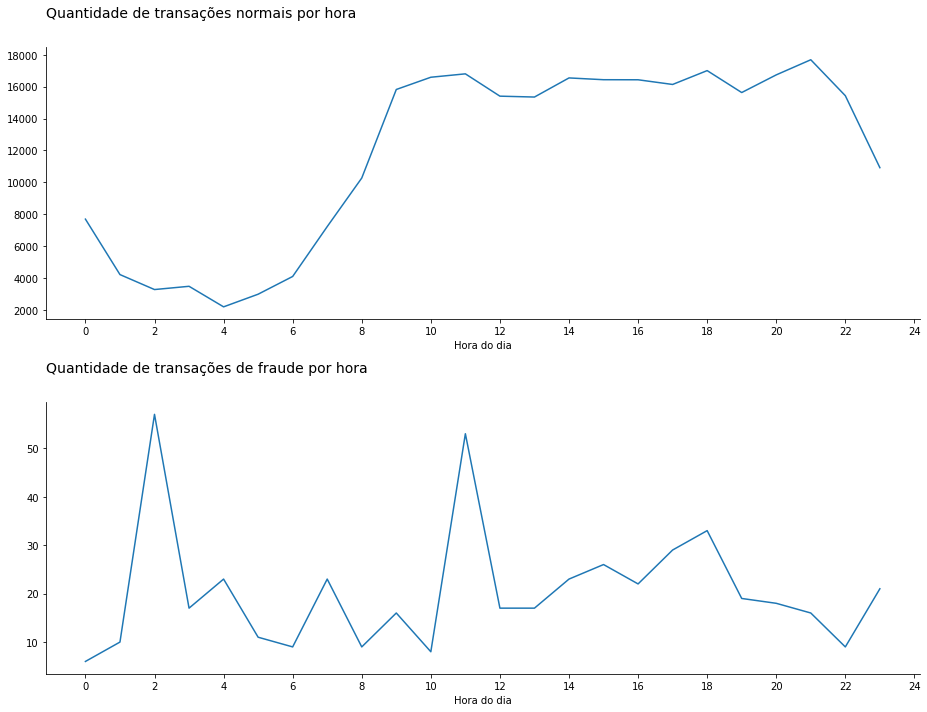

In [ ]:
# analisando as transações normais e transações de fraudes por hora

# setar cor
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(13,10))
ax0 = sns.lineplot(data=df[df.Class == 0].groupby('hora-dia').count()['Amount'], ax=ax0)
ax0.set_title('Quantidade de transações normais por hora', loc='left', fontsize=14, pad=30)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.grid(False)
ax0.locator_params(axis='x', nbins=24)
ax0.set_xlabel('Hora do dia').set_visible(True)
ax0.set_ylabel('Amount').set_visible(False)

ax1 = sns.lineplot(data=df[df.Class == 1].groupby('hora-dia').count()['Amount'], ax=ax1)
ax1.set_title('Quantidade de transações de fraude por hora', loc='left', fontsize=14, pad=30)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(False)
ax1.locator_params(axis='x', nbins=24)
ax1.set_xlabel('Hora do dia').set_visible(True)
ax1.set_ylabel('Amount').set_visible(False)
plt.tight_layout()

Podemos verificar no plot acima que há um volume maior de transações entre 08h e 21h, sendo que a partir das 22h até às 07h o volume de operações com cartões é menor. Por outro lado, observamos que as transações fraudulentas com cartão ocorrem com mais intensidade às 02h e 11h, mas não existe um comportamento de um período em que as transações com fraudes ocorram com mais frequência.

Outra visualização interessante é o gráfico de densidade que é muito útil para compararmos as distribuições de cada variável para cada classe, e verificar quais as mais importantes para detecção de anomalias.

O foco nessa visualização é econtrar as distribuições que diferem uma da outra, permitindo identificar fraudes mais facilmente.

Conforme documentado abaixo, pudemos verificar que as variáveis `V3`, `V4`, `V10` e `V11` são bastante distintas. Já as variáveis `V8`, `V13` e `V15` são muito similares, apresentando aproximadamente o mesmo comportamento.

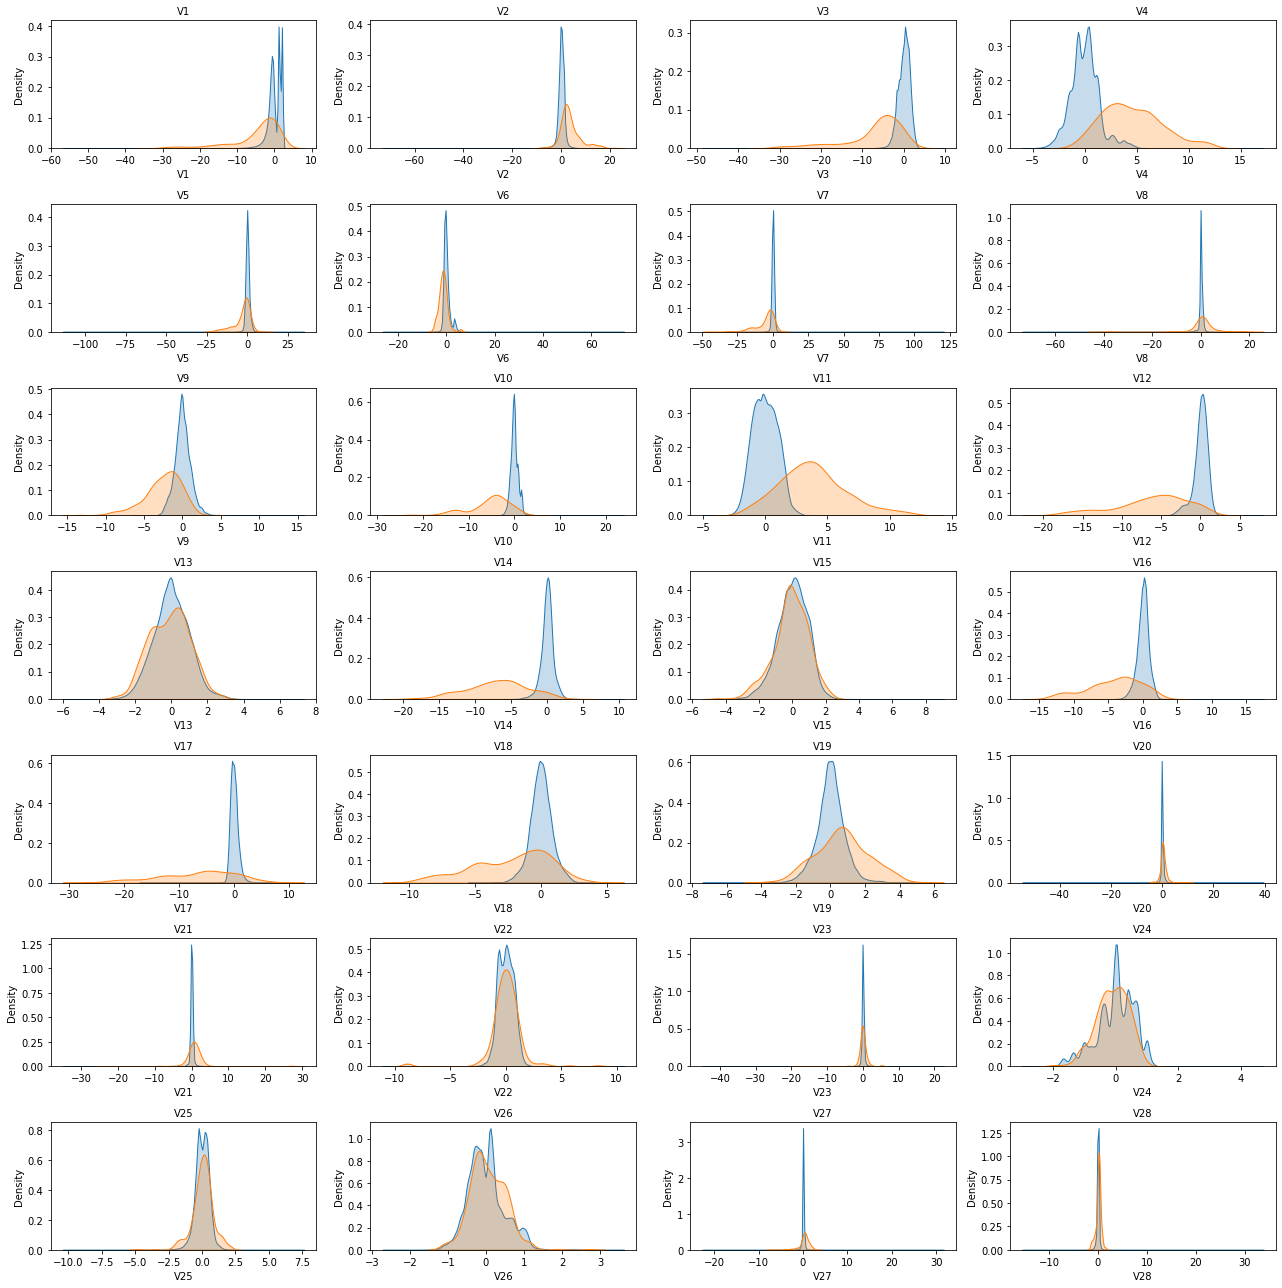

In [ ]:
column_names = df.drop(['Class', 'Amount', 'Time', 'hora', 'hora-dia'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()

# 3 - Preparação dos dados

Nesta etapa precisamos tratar os dados para certificarmos que as informações estão de acordo com o que se espera. Consistência de erros e valores ausentes, dados desbalanceados devem ser resolvidos para que possamos selecionar amostras aleatórias e utilizá-las para treino, validação e teste. 

## Padronizacao dos dados da variável Time e Amount


Nessa etapa, iremos normalizar os dados da coluna Time e Amount, que possuíam seus valores originais. Para isso, a padronização será feita por meio da classe StandardScaler.

In [ ]:
# importando os pacotes necessários do scikit learn para preparar os dados
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# criando uma copia do dataframe
df_base = df.copy()

# padronizando as colunas time e amount
scaler = StandardScaler()
df_base['Amount_Scaler'] = scaler.fit_transform(df_base['Amount'].values.reshape(-1,1))
df_base['Time_Scaler'] = scaler.fit_transform(df_base['Time'].values.reshape(-1,1))

# drop das colunas hora, hora-dia, amount e time
df_base.drop(['Time', 'Amount', 'hora', 'hora-dia'], axis=1, inplace=True)

# verificar as primeiras entradas
df_base.head()

# Reordenando a coluna classe para última posicao
classe = df_base['Class']
df_base.drop(labels='Class', axis=1, inplace=True)
df_base['Class'] = classe
df_base.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount_Scaler,Time_Scaler,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.996583,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.996583,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.996562,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.996562,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.996541,0


## Separar dados entre Treino, Teste e Validação

Agora iremos dividir o conjunto de dados entre treino, teste e validação. Assim poderemos testar o modelo com uma base de dados que ele não teve contato.Vamos dividir os dados, de forma estratificada pela classe, da seguinte forma:

70% treino
15% validação
15% teste

In [ ]:
# separando os dados entre feature matrix e target vector
X = df_base.drop('Class', axis=1)
y = df_base.Class

# Dividir o dataset entre treino, teste e validação - separando os dados de treino em 70%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, shuffle=True)

# Separando os dados de validação e teste em 15% cada
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, shuffle=True)

Agora vamos verificar os shapes das bases de treino, teste e validação

In [ ]:
# Vamos ver o shape das amostras separadas
print(f'X_train:\t{X_train.shape}')
print(f'y_train:\t{y_train.shape}')
print(f'% base treino\t{(X_train.shape[0]/df_base.shape[0])*100:0.2f}%\n')
print(f'X_val:\t\t{X_val.shape}')
print(f'y_val:\t\t{y_val.shape}')
print(f'% base valid\t{(X_val.shape[0]/df_base.shape[0])*100:0.2f}%\n')
print(f'X_test:\t\t{X_test.shape}')
print(f'y_test:\t\t{y_test.shape}')
print(f'% base teste\t{(X_test.shape[0]/df_base.shape[0])*100:0.2f}%\n')

X_train:	(199364, 30)
y_train:	(199364,)
% base treino	70.00%

X_val:		(42721, 30)
y_val:		(42721,)
% base valid	15.00%

X_test:		(42722, 30)
y_test:		(42722,)
% base teste	15.00%



Conforme consta acima, nossa base foi devidamente dividida, com as proporções definidas para os dados de treino, validação e teste.

## Balanceamento dos dados

E por último iremos balancear os dados, de forma que nossos modelos apresentem um melhor desempenho na hora de identificar transações fraudulentas. Dessa forma, também evitamos o *overfitting* (quando um modelo se torna muito bom em dados ja vistos, mas não tem um bom desempenho em dados novos)

Serão utilizados 3 métodos de balanceamento:

* **RandomUnderSampling (RUS)** - Este método descarta um subjconjunto aleatório da classe majoritária, preservando as características da classe minoritária. Ele pode acarretar em uma performance inferior na hora de fazer predições da classe majoritária.

* **ADASYN** - A idéia principal do algoritmo ADASYN é usar a distribuição de densidade
como um critério para decidir automaticamente o número de dados sintéticos que
precisam ser gerados para cada exemplo da classe minoritária.
 

* **SMOTE** - É um dos métodos de sobreamostragem mais comumente usados ​​para resolver o problema de desequilíbrio. O algoritmo Smote cria dados artificiais com base no recurso da semelhança entre os exemplos da classe minoritária existentes.

**Balanceamento dos Dados com Under-Sampling (RUS)**

0    344
1    344
Name: Class, dtype: int64


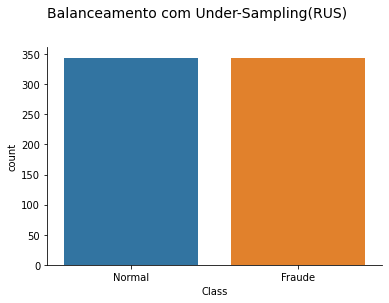

In [ ]:
# Balanceamento dos dados
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Checar o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# Plotar a nova distribuição de Classes
fig, ax = plt.subplots()
sns.countplot(y_rus, ax=ax)
ax.set_title('Balanceamento com Under-Sampling(RUS)', loc='left', fontsize=14, pad=30)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(['Normal', 'Fraude'])
ax.grid(False)
plt.show();

**Balanceamento dos Dados com Over-Sampling (SMOTE)**

0    199020
1    199020
Name: Class, dtype: int64


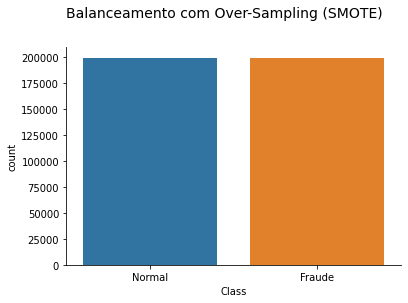

In [ ]:
# Balanceamento dos dados
from imblearn.over_sampling import SMOTE
smo = SMOTE()
X_smo, y_smo = smo.fit_resample(X_train, y_train)

# Checar o balanceamento das classes
print(pd.Series(y_smo).value_counts())

# Plotar a nova distribuição de Classes
fig, ax = plt.subplots()
sns.countplot(y_smo, ax=ax)
ax.set_title('Balanceamento com Over-Sampling (SMOTE)', loc='left', fontsize=14, pad=30)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(['Normal', 'Fraude'])
ax.grid(False)
plt.show();

**Balanceamento dos Dados com Over-Sampling (ADASYN)**

0    199020
1    198976
Name: Class, dtype: int64


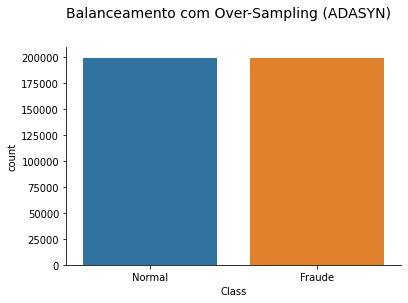

In [ ]:
# Balanceamento dos dados
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_ada, y_ada = ada.fit_resample(X_train, y_train)

# Checar o balanceamento das classes
print(pd.Series(y_ada).value_counts())

# Plotar a nova distribuição de Classes
fig, ax = plt.subplots()
sns.countplot(y_ada, ax=ax)
ax.set_title('Balanceamento com Over-Sampling (ADASYN)', loc='left', fontsize=14, pad=30)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticklabels(['Normal', 'Fraude'])
ax.grid(False)
plt.show();

Com os dados balanceados, podemos ver a matriz de correlação e identificar quais variáveis estão mais fortemente relacionadas com as outras e quais impactam na classificação de fraudes.

Observe como anteriormente, sem o balanceamento de dados, a matriz de correlação não trazia nenhuma informação relevante. Entretanto, ela traz muito mais informações após um correto balanceamento.

## Matriz de correlação das variáveis

Em resumo uma matriz de correlação exibe o grau de correlação entre várias interseções de medidas como uma matriz de células retangulares. Cada célula na matriz representa a interseção de duas medidas, e a cor da célula indica o grau de correlação entre essas duas medidas.

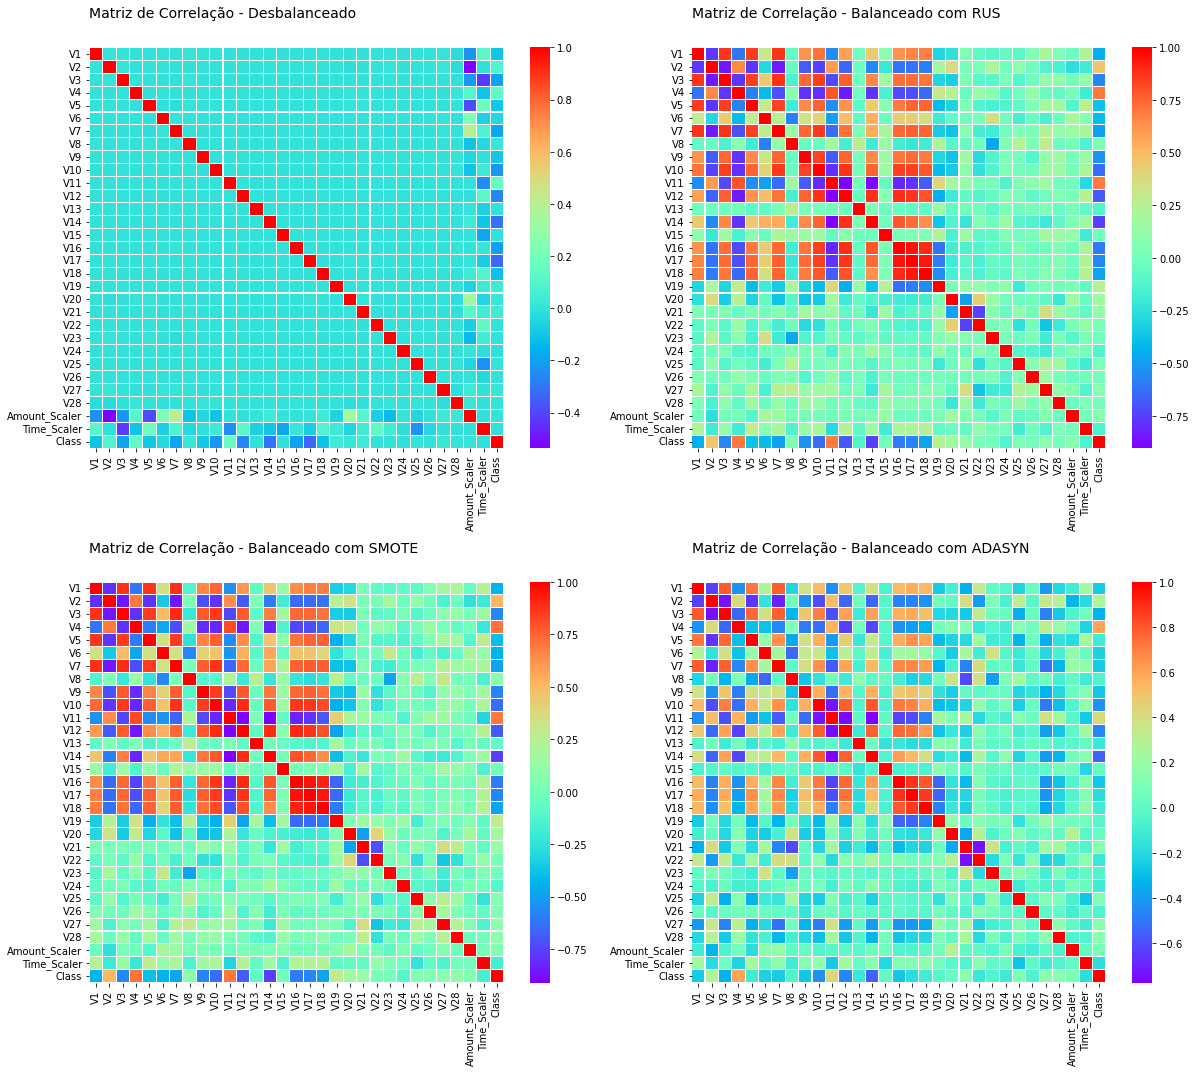

In [ ]:
# plotar a matriz de correlação

corr = X_train.corr()
corr = pd.concat([X_train, y_train], axis=1).corr()
corr_rus = pd.concat([X_rus, y_rus], axis=1).corr()
corr_smo = pd.concat([X_smo, y_smo], axis=1).corr()
corr_ada = pd.concat([X_ada, y_ada], axis=1).corr()

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (17,15))

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="rainbow", ax=ax[0][0])
ax[0][0].set_title('Matriz de Correlação - Desbalanceado', loc='left', fontsize=14, pad=30)

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="rainbow", ax=ax[0][1])
ax[0][1].set_title('Matriz de Correlação - Balanceado com RUS', loc='left', fontsize=14, pad=30)

sns.heatmap(corr_smo, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="rainbow", ax=ax[1][0])
ax[1][0].set_title('Matriz de Correlação - Balanceado com SMOTE', loc='left', fontsize=14, pad=30)

sns.heatmap(corr_ada, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="rainbow", ax=ax[1][1])
ax[1][1].set_title('Matriz de Correlação - Balanceado com ADASYN', loc='left', fontsize=14, pad=30)

plt.tight_layout();

Podemos ver que para o caso com amostra não balanceada as variáveis parecem não possuir correlação. Já nas amostras balanceadas a correlação fica bem clara. É visível também que essa correlação é mais forte nos balanceamentos utilizando o Random Under-Sampling e Over-Sampling SMOTE. No método Over-Sampling ADASYN a correlação é mais evidente apenas na variável V4.

Observamos os outros balanceamentos podemos observar que:

* V10, V12 e V14 apresentam uma correlação negativa e quanto mais negativo o valor, mais indicará que temos uma transação com fraude


* V2, V4 e V11 apresentam uma correlação positiva e quando mais alto este valor, mais ele indicará que se trata de uma fraude.

Abaixo plotamos boxplots para essas variáveis, apresentando primeiros as variáveis com correlação negativa e, logo após, as variáveis com correlação positiva.

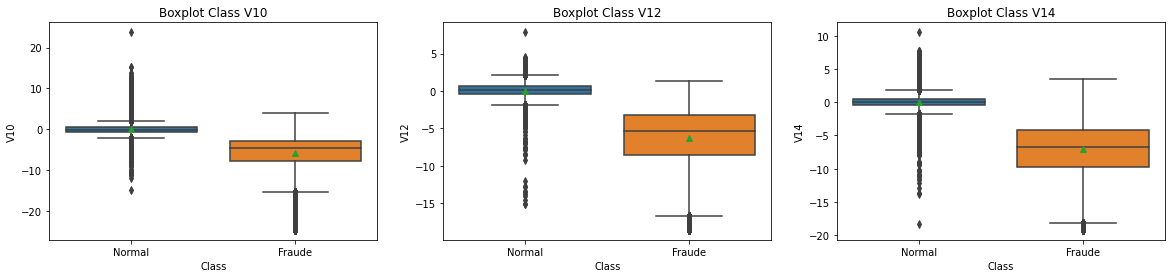

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20,4))

sns.boxplot(x="Class", y="V10", data=pd.concat([X_smo, y_smo], axis=1), showmeans=True, ax=ax[0])
ax[0].set_xticklabels(['Normal', 'Fraude'])
ax[0].set_title('Boxplot Class V10')

sns.boxplot(x="Class", y="V12", data=pd.concat([X_smo, y_smo], axis=1), showmeans=True, ax=ax[1])
ax[1].set_xticklabels(['Normal', 'Fraude'])
ax[1].set_title('Boxplot Class V12')


sns.boxplot(x="Class", y="V14", data=pd.concat([X_smo, y_smo], axis=1),showmeans=True, ax=ax[2])
ax[2].set_xticklabels(['Normal', 'Fraude'])
ax[2].set_title('Boxplot Class V14')

plt.show()

Fica evidente no boxplot acima que as variáveis V10, V12 e V14 possuem uma correlação negativa com a variável classe, ou seja, quanto menor o valor maior o indicativo de fraude.

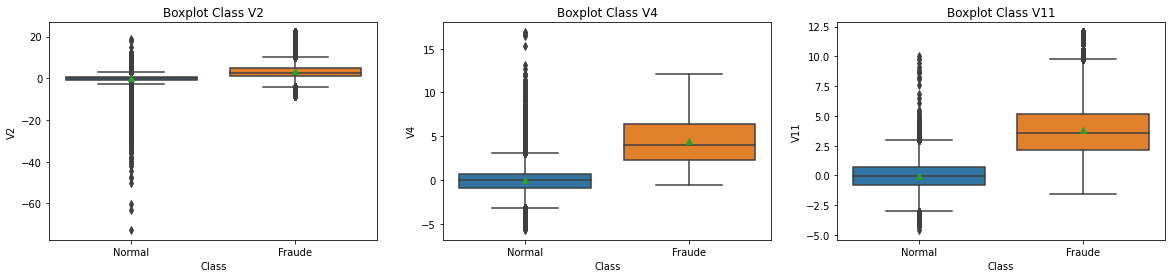

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20,4))

sns.boxplot(x="Class", y="V2", data=pd.concat([X_smo, y_smo], axis=1), showmeans=True, ax=ax[0])
ax[0].set_xticklabels(['Normal', 'Fraude'])
ax[0].set_title('Boxplot Class V2')

sns.boxplot(x="Class", y="V4", data=pd.concat([X_smo, y_smo], axis=1),showmeans=True, ax=ax[1])
ax[1].set_xticklabels(['Normal', 'Fraude'])
ax[1].set_title('Boxplot Class V4')


sns.boxplot(x="Class", y="V11", data=pd.concat([X_smo, y_smo], axis=1),showmeans=True, ax=ax[2])
ax[2].set_xticklabels(['Normal', 'Fraude'])
ax[2].set_title('Boxplot Class V11')
plt.show()

Já no segundo plot, podemos perceber que as variáveis V2, V4 e V11 possuem uma correlação positiva com a variável classe, ou seja, quanto maior o valor, maior o indicativo de fraude.

#4 - Modelos de Machine Learning

Nesta etapa definimos e avaliamos os modelos de Machine Learning que vamos testar. Documentamos as técnicas selecionadas, motivo da escolha, avaliação e análise do comportamento das métricas para cada modelo de machine learning escolhido. 

## Modelos propostos


Para nosso projeto iremos utilizar os seguintes modelos:

* **Regressão Logística**

* **Decision Tree**

* **Random Forest**

Para os modelos de Regressão Logística e Decision Tree, faremos uma modelagem para cada balanceamento feito (Random Under-Sampling, SMOTE e ADASYS). Para o Random Forest iremos utilizar apenas os dados balanceados pelo Random Under-Sampling, uma vez que, pelos balanceamentos de Over-Sampling o tempo de processamento é muito elevado para o algoritmo.

A ideia é comparar as métrica de cada um dos três modelos aplicados aos dados de validação, afim de verificamos o que apresenta os melhores resultados aplicáveis ao nosso problema.

## Métricas avaliadas

Buscamos avaliar as seguintes métricas dos nossos modelos:

* **Acurácia**: Quantidade de acertos do modelo. É a representatividade do número de previsões corretas sobre o número total de previsões. 

* **Precisão**: A precisão é a razão TP / (TP + FP) onde TP é o número de verdadeiros positivos e FP o número de falsos positivos.  Ela é uma boa métrica quando o falso positivo (FP) tem risco alto. Em nosso problema esse risco seria o nosso modelo classificar como fraude um transação que não é.

* **Recall**: O recall é a razão TP / (TP + FN) onde TP é o número de verdadeiros positivos e FN o número de falsos negativos. Ao contrário da precisão, ela é uma boa métrica quando o falso negativo (FN) tem risco alto. Em nosso problema esse risco seria o nosso modelo considerar como normal uma transação que na verdade se trata de uma fraude.

* **F1-score**: É a média harmonica entre precisão e recall. O melhor valor possível para 0 F1-score é 1 e o pior é 0.

* **Curva ROC-AUC**: A AUC (“area under the ROC curve”) nada mais é que uma maneira de resumir a curva ROC em um único valor, agregando todos os limiares da ROC, calculando a “área sob a curva”. O valor do AUC varia de 0,0 até 1,0 e o limiar entre a classe é 0,5. Ou seja, acima desse limite, o algoritmo classifica em uma classe e abaixo na outra classe. Quanto maior o AUC, melhor.

**Para o nosso problema considerando o prejuízo financeiro elevado que uma transação não identificada corretamente como fraude pode gerar aos bancos, iremos priorizar as métricas de Recall em nossas análises. Outras que também serão priorizadas serão F1-score e a Curva ROC-AUC.**


In [ ]:
# importando os módulo do scikitlearn utilizados
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Regressão Logística

A regressão logística é um algoritmo de aprendizado de máquina que é usado para os problemas de classificação, é um algoritmo de análise preditiva e baseado no conceito de probabilidade. Abaixo aplicamos o modelo para os três balanceamentos de dados que fizemos (RUS, SMOTE e ADASYS), para compararmos os resultados e avaliarmos as melhores métricas.

**Regressão Logística - Random Under Sampling**

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9615    0.9803     42647
           1     0.0398    0.9189    0.0763        74

    accuracy                         0.9615     42721
   macro avg     0.5198    0.9402    0.5283     42721
weighted avg     0.9982    0.9615    0.9788     42721

AUC: 0.9402

Recall:		0.9189
Acurácia:	0.9615
Precisão:	0.0398
F1-Score:	0.9615


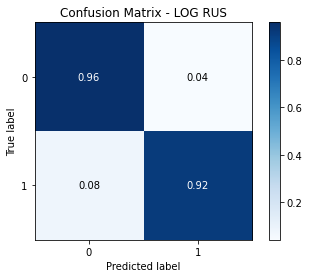

In [ ]:
# Escolher e instanciar os Hyperparameters
model_log_rus = LogisticRegression()

# Fit do modelo (Treinar)
model_log_rus.fit(X_rus, y_rus)

# Fazer previsões em cima de novos dados 
y_pred_rus = model_log_rus.predict(X_val)

# Plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_pred_rus, normalize=True, title='Confusion Matrix - LOG RUS') 


# Imprimir relatório de classificação
print('Relatório de Classificação:\n',classification_report(y_val, y_pred_rus, digits=4))

# Imprimir a área sob curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_val, y_pred_rus)))

print(f'Recall:\t\t{recall_score(y_val, y_pred_rus, pos_label=1):0.4f}')
print(f'Acurácia:\t{accuracy_score(y_val, y_pred_rus):0.4f}')
print(f'Precisão:\t{precision_score(y_val, y_pred_rus, zero_division=0):0.4f}')
print(f'F1-Score:\t{f1_score(y_val, y_pred_rus, average="micro"):0.4f}')


**Regressão Logística - Over-Sampling SMOTE**



Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9753    0.9874     42647
           1     0.0607    0.9189    0.1138        74

    accuracy                         0.9752     42721
   macro avg     0.5303    0.9471    0.5506     42721
weighted avg     0.9982    0.9752    0.9859     42721

AUC: 0.9471

Recall:		0.9189
Acurácia:	0.9752
Precisão:	0.0607
F1-Score:	0.9752


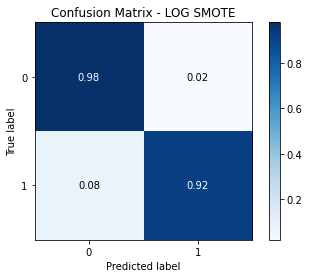

In [ ]:
# Escolher e instanciar os Hyperparameters
model_log_smo = LogisticRegression(max_iter=3000)

# Fit do modelo (Treinar)
model_log_smo.fit(X_smo, y_smo)

# Fazer previsões em cima de novos dados 
y_pred_smo = model_log_smo.predict(X_val)

# Plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_pred_smo, normalize=True, title='Confusion Matrix - LOG SMOTE') #incluir cmap


# Imprimir relatório de classificação
print('Relatório de Classificação:\n',classification_report(y_val, y_pred_smo, digits=4))

# Imprimir a área sob curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_val, y_pred_smo)))

print(f'Recall:\t\t{recall_score(y_val, y_pred_smo, pos_label=1):0.4f}')
print(f'Acurácia:\t{accuracy_score(y_val, y_pred_smo):0.4f}')
print(f'Precisão:\t{precision_score(y_val, y_pred_smo, zero_division=0):0.4f}')
print(f'F1-Score:\t{f1_score(y_val, y_pred_smo, average="micro"):0.4f}')

**Regressão Logística - Over-Sampling - ADASYS**



Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9195    0.9580     42647
           1     0.0197    0.9324    0.0386        74

    accuracy                         0.9195     42721
   macro avg     0.5098    0.9260    0.4983     42721
weighted avg     0.9982    0.9195    0.9564     42721

AUC: 0.9260

Recall:		0.9324
Acurácia:	0.9195
Precisão:	0.0197
F1-Score:	0.9195


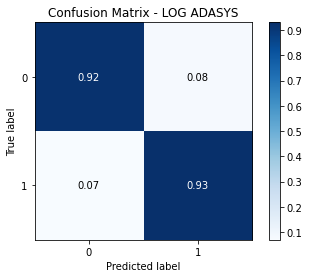

In [ ]:
# Escolher e instanciar os Hyperparameters
model_log_ada = LogisticRegression(max_iter=3000)

# Fit do modelo (Treinar)
model_log_ada.fit(X_ada, y_ada)

# Fazer previsões em cima de novos dados 
y_pred_ada = model_log_ada.predict(X_val)

# Plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_val, y_pred_ada, normalize=True, title='Confusion Matrix - LOG ADASYS') #incluir cmap


# Imprimir relatório de classificação
print('Relatório de Classificação:\n',classification_report(y_val, y_pred_ada, digits=4))

# Imprimir a área sob curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_val, y_pred_ada)))

print(f'Recall:\t\t{recall_score(y_val, y_pred_ada, pos_label=1):0.4f}')
print(f'Acurácia:\t{accuracy_score(y_val, y_pred_ada):0.4f}')
print(f'Precisão:\t{precision_score(y_val, y_pred_ada, zero_division=0):0.4f}')
print(f'F1-Score:\t{f1_score(y_val, y_pred_ada, average="micro"):0.4f}')

Plotados os três modelos, podemos que observar que todos eles apresentam métrica de **Recall** para fraude acima de 0.90 ou bem próximo disso. **Mas o primeiro modelo se destaca nessa métrica por apresentar um recall de 0.9189**. A **AUC - Área sob a curva** também é melhor no **primeiro modelo**, apresentando uma métrica de 0.9428. O **F1-score** é melhor no segundo modelo, balanceado com SMOTE, apresentando um resultado de 0.9745, mas o primeiro também apresentou um resultado interessante de 0.9666. Portanto, considerando as métricas analisadas, e priorizando dentre elas, principalmente a métrica do Recall, podemos concluir que **o primeiro modelo balanceado com o Random-Under-Sampling apresenta os melhores resultados**. Na confusion matrix é possível observar que ele apresentou aproximadamente, 8% de falsos negativos, acertando em 92% dos casos as transações fraudulentas. Agora vamos fazer a modelagem utilizando os algoritmos de Decision Tree e Random Forest, para comparabilidade. 

## Arvore de decisão

Uma árvore de decisão é um algoritmo de aprendizado de máquina supervisionado que é utilizado para classificação e para regressão. Isto é, pode ser usado para prever categorias discretas (sim ou não, por exemplo) e para prever valores numéricos (o valor do lucro em reais). Assim como um fluxograma, a árvore de decisão estabelece nós (decision nodes) que se relacionam entre si por uma hierarquia. Existe o nó-raiz (root node), que é o mais importante, e os nós-folha (leaf nodes), que são os resultados finais. No contexto de machine learning, o raiz é um dos atributos da base de dados e o nó-folha é a classe ou o valor que será gerado como resposta. Em uma árvore de decisão, uma decisão é tomada através do caminhamento a partir do nó raiz até o nó folha.

 Abaixo aplicamos o modelo para os três balanceamentos de dados que fizemos (RUS, SMOTE e ADASYS), para compararmos os resultados e avaliarmos as melhores métricas. É possível plotar a visualização da árvore de decisão para cada modelo, mas não o faremos neste trabalho. Vamos analisar apenas as métricas do algoritmo.

**Árvore de decisão - Random Under Sampling**

Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.9999    0.9708    0.9851     42647
           1     0.0518    0.9189    0.0981        74

    accuracy                         0.9707     42721
   macro avg     0.5258    0.9449    0.5416     42721
weighted avg     0.9982    0.9707    0.9836     42721

AUC: 0.9449

Recall:		0.9189
Acurácia:	0.9707
Precisão:	0.0518
F1-Score:	0.9707


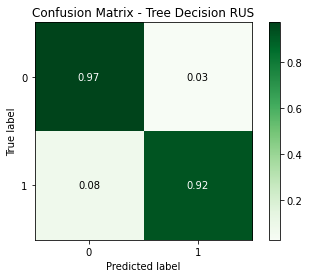

In [ ]:
# Escolher os Hyperparameters
model_tree_rus = DecisionTreeClassifier(max_depth=4, criterion='entropy')

# Fit do Modelo(Treinar)
model_tree_rus.fit(X_rus, y_rus)

# Fazer previsões em cima dos dados de teste
y_pred_tree_rus = model_tree_rus.predict(X_val)

# Plotar matriz de confusão 
skplt.metrics.plot_confusion_matrix(y_val, y_pred_tree_rus, normalize=True, title='Confusion Matrix - Tree Decision RUS', cmap= plt.cm.Greens)

# Imprimir relatório de classificação
print('Relatório de Classificação: \n', classification_report(y_val, y_pred_tree_rus, digits=4))

# Imprimir a Área sob Curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_val, y_pred_tree_rus)))

print(f'Recall:\t\t{recall_score(y_val, y_pred_tree_rus, pos_label=1):0.4f}')
print(f'Acurácia:\t{accuracy_score(y_val, y_pred_tree_rus):0.4f}')
print(f'Precisão:\t{precision_score(y_val, y_pred_tree_rus, zero_division=0):0.4f}')
print(f'F1-Score:\t{f1_score(y_val, y_pred_tree_rus, average="micro"):0.4f}')

**Árvore de Decisão - Over-Sampling SMOTE**

Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.9997    0.9885    0.9941     42647
           1     0.1121    0.8378    0.1978        74

    accuracy                         0.9882     42721
   macro avg     0.5559    0.9132    0.5959     42721
weighted avg     0.9982    0.9882    0.9927     42721

AUC: 0.9132

Recall:		0.8378
Acurácia:	0.9882
Precisão:	0.1121
F1-Score:	0.9882


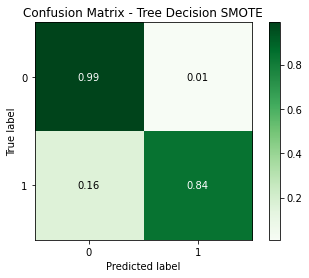

In [ ]:
# Escolher os Hyperparameters
model_tree_smo = DecisionTreeClassifier(max_depth=4, criterion='entropy')

# Fit do Modelo(Treinar)
model_tree_smo.fit(X_smo, y_smo)

# Fazer previsões em cima dos dados de teste
y_pred_tree_smo = model_tree_smo.predict(X_val)

# Plotar matriz de confusão 
skplt.metrics.plot_confusion_matrix(y_val, y_pred_tree_smo, normalize=True, title='Confusion Matrix - Tree Decision SMOTE', cmap= plt.cm.Greens)

# Imprimir relatório de classificação
print('Relatório de Classificação: \n', classification_report(y_val, y_pred_tree_smo, digits=4))

# Imprimir a Área sob Curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_val, y_pred_tree_smo)))

print(f'Recall:\t\t{recall_score(y_val, y_pred_tree_smo, pos_label=1):0.4f}')
print(f'Acurácia:\t{accuracy_score(y_val, y_pred_tree_smo):0.4f}')
print(f'Precisão:\t{precision_score(y_val, y_pred_tree_smo, zero_division=0):0.4f}')
print(f'F1-Score:\t{f1_score(y_val, y_pred_tree_smo, average="micro"):0.4f}')

**Árvore de Decisão - Over-Sampling - ADASYS**

Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.9998    0.9414    0.9698     42647
           1     0.0261    0.9054    0.0508        74

    accuracy                         0.9414     42721
   macro avg     0.5130    0.9234    0.5103     42721
weighted avg     0.9981    0.9414    0.9682     42721

AUC: 0.9234

Recall:		0.9054
Acurácia:	0.9414
Precisão:	0.0261
F1-Score:	0.9414


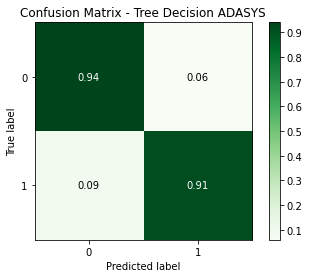

In [ ]:
# Escolher os Hyperparameters
model_tree_ada = DecisionTreeClassifier(max_depth=4, criterion='entropy')

# Fit do Modelo(Treinar)
model_tree_ada.fit(X_ada, y_ada)

# Fazer previsões em cima dos dados de validacao
y_pred_tree_ada = model_tree_ada.predict(X_val)

# Plotar matriz de confusão 
skplt.metrics.plot_confusion_matrix(y_val, y_pred_tree_ada, normalize=True, title='Confusion Matrix - Tree Decision ADASYS', cmap= plt.cm.Greens)

# Imprimir relatório de classificação
print('Relatório de Classificação: \n', classification_report(y_val, y_pred_tree_ada, digits=4))

# Imprimir a Área sob Curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_val, y_pred_tree_ada)))

print(f'Recall:\t\t{recall_score(y_val, y_pred_tree_ada, pos_label=1):0.4f}')
print(f'Acurácia:\t{accuracy_score(y_val, y_pred_tree_ada):0.4f}')
print(f'Precisão:\t{precision_score(y_val, y_pred_tree_ada, zero_division=0):0.4f}')
print(f'F1-Score:\t{f1_score(y_val, y_pred_tree_ada, average="micro"):0.4f}')

Plotados os três modelos de Árvore de decisão, podemos que observar que o **terceiro modelo balanceado com Over-Sampling ADASYS apresentou a melhor métrica de Recall**, com um índice de 0.9459. Porém este modelo apresentou as menores métricas F1-Score e AUC - Área sob a curva, com índices de 0.8208 e 0.8832 respectivamente. Analisando essas duas métricas, percebemos que o **primeiro modelo balanceado apresenta a melhor métrica AUC - Area sob a curva**, com indice de 0.9136. No entanto a métrica de **F1-Score é melhor no segundo modelo**. Diante desse cenário em que cada métrica é melhor em um modelo, precisamos ponderar que, embora seja importante que tenhamos um modelo com bons resultados em todas as métricas, o nosso foco principal, em termos de risco do problema, é que o modelo apresente um bom Recall, considerando o prejuízo financeiro elevado que uma transação não identificada corretamente como fraude pode gerar aos bancos. **Por essa razão iremos adotar o terceiro modelo de árvore de decisão, balanceado também o Over-Sampling ADASYS.**

Na confusion matrix é possível observar que ele apresentou aproximadamente, 5% de falsos negativos, acertando em 95% dos casos as transações fraudulentas. Agora vamos fazer a modelagem utilizando os algoritmos de Random Forest, para comparação final.

## Random Forest

Random Forest (Floresta Aleatória) é um método de aprendizado conjunto. A ideia, porém, é treinar várias árvores de decisão (descorrelacionadas), obtidas a partir de amostras do dataset, e fazer predições utilizando os resultados que mais aparecem em caso de um problema de classificação, ou a média dos valores obtidos em caso de regressão.

Para o Random Forest iremos utilizar apenas os dados balanceados pelo Random Under-Sampling, uma vez que, pelos balanceamentos de Over-Sampling o tempo de processamento é muito elevado para o algoritmo.

**Random Forest - Random Under Sampling**

Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.9999    0.9764    0.9880     42647
           1     0.0633    0.9189    0.1184        74

    accuracy                         0.9763     42721
   macro avg     0.5316    0.9477    0.5532     42721
weighted avg     0.9982    0.9763    0.9865     42721

AUC: 0.9477	

Recall:		0.9189
Acurácia:	0.9763
Precisão:	0.0633
F1-Score:	0.9763


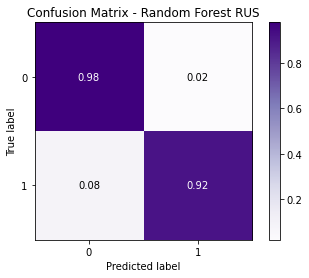

In [ ]:
# Escolher os Hyperparameters
rf_rus = RandomForestClassifier(n_estimators=120, criterion='entropy')

# Fit do Modelo(Treinar)
rf_rus.fit(X_rus, y_rus)

# Fazer previsões em cima dos dados de validacao
y_pred_rf_rus = rf_rus.predict(X_val)

# Plotar matriz de confusão 
skplt.metrics.plot_confusion_matrix(y_val, y_pred_rf_rus, normalize=True, title='Confusion Matrix - Random Forest RUS', cmap= plt.cm.Purples)

# Imprimir relatório de classificação
print('Relatório de Classificação: \n', classification_report(y_val, y_pred_rf_rus, digits=4))

# Imprimir a Área sob Curva
print('AUC: {:.4f}\t\n'.format(roc_auc_score(y_val, y_pred_rf_rus)))

print(f'Recall:\t\t{recall_score(y_val, y_pred_rf_rus, pos_label=1):0.4f}')
print(f'Acurácia:\t{accuracy_score(y_val, y_pred_rf_rus):0.4f}')
print(f'Precisão:\t{precision_score(y_val, y_pred_rf_rus, zero_division=0):0.4f}')
print(f'F1-Score:\t{f1_score(y_val, y_pred_rf_rus, average="micro"):0.4f}')

Nosso modelo de Random Forest balanceado com Random Under-Sampling apresentou uma métrica Recall de 0.8784, menor que os modelos de regressão logística e árvore de decisão plotados e analisados anteriormente. A **área sob a curva** apresentada é de 0.9314 e **F1-score** de 0.9843. 

Na confusion matrix é possível observar que ele apresentou aproximadamente, 12% de falsos negativos, acertando em 88% dos casos as transações fraudulentas.

## Avaliação dos modelos propostos

Após analisarmos os modelos para cada algoritmo e selecionado os melhores balanceamentos, vamos confrontar o melhor modelo de regressão, o melhor modelo de árvore de decisão e o modelo de random forest, avaliando as métricas de cada um e aderência ao nosso problema.

Conforme documentado acima, para a regressão logísica o melhor resultado foi encontrado com o balanceamento do tipo Random Under-Sampling. Para o algoritmo de árvore de decisão, as melhores métricas são do balanceamentos Over-Sampling ADASYS. Para o algoritmo de random forest, utilizamos apenas o balanceamento under-sampling. 

Abaixo temos as métricas de cada modelo, para comparação.

In [ ]:
print('Métricas - Regressão Logística - Random Under Sampling')
print(f'AUC:\t\t{roc_auc_score(y_val, y_pred_rus):0.4f}')
print(f'Recall:\t\t{recall_score(y_val, y_pred_rus, pos_label=1):0.4f}')
print(f'Acurácia:\t{accuracy_score(y_val, y_pred_rus):0.4f}')
print(f'Precisão:\t{precision_score(y_val, y_pred_rus, zero_division=0):0.4f}')
print(f'F1-Score:\t{f1_score(y_val, y_pred_rus, average="micro"):0.4f}\n')

print('Métricas - Tree Decision - ADASYS')
print(f'AUC:\t\t{roc_auc_score(y_val, y_pred_tree_ada):0.4f}')
print(f'Recall:\t\t{recall_score(y_val, y_pred_tree_ada, pos_label=1):0.4f}')
print(f'Acurácia:\t{accuracy_score(y_val, y_pred_tree_ada):0.4f}')
print(f'Precisão:\t{precision_score(y_val, y_pred_tree_ada, zero_division=0):0.4f}')
print(f'F1-Score:\t{f1_score(y_val, y_pred_tree_ada, average="micro"):0.4f}\n')

print('Métricas - Random Forest - Random Under Sampling')
print(f'AUC:\t\t{roc_auc_score(y_val, y_pred_rf_rus):0.4f}')
print(f'Recall:\t\t{recall_score(y_val, y_pred_rf_rus, pos_label=1):0.4f}')
print(f'Acurácia:\t{accuracy_score(y_val, y_pred_rf_rus):0.4f}')
print(f'Precisão:\t{precision_score(y_val, y_pred_rf_rus, zero_division=0):0.4f}')
print(f'F1-Score:\t{f1_score(y_val, y_pred_rf_rus, average="micro"):0.4f}\n')

Métricas - Regressão Logística - Random Under Sampling
AUC:		0.9402
Recall:		0.9189
Acurácia:	0.9615
Precisão:	0.0398
F1-Score:	0.9615

Métricas - Tree Decision - ADASYS
AUC:		0.9234
Recall:		0.9054
Acurácia:	0.9414
Precisão:	0.0261
F1-Score:	0.9414

Métricas - Random Forest - Random Under Sampling
AUC:		0.9477
Recall:		0.9189
Acurácia:	0.9763
Precisão:	0.0633
F1-Score:	0.9763



Conforme documentado acima, verificamos que o modelo preparado utilizando o algoritmo de Random Forest apresentou as melhores métricas. O segundo melhor modelo foi o da regressão logística com balanceamento pelo random under-sampling. O modelo de árvore de decisão, embora tenha apresentado os menores índices dos três, ainda é um bom modelo, com bons scores. 



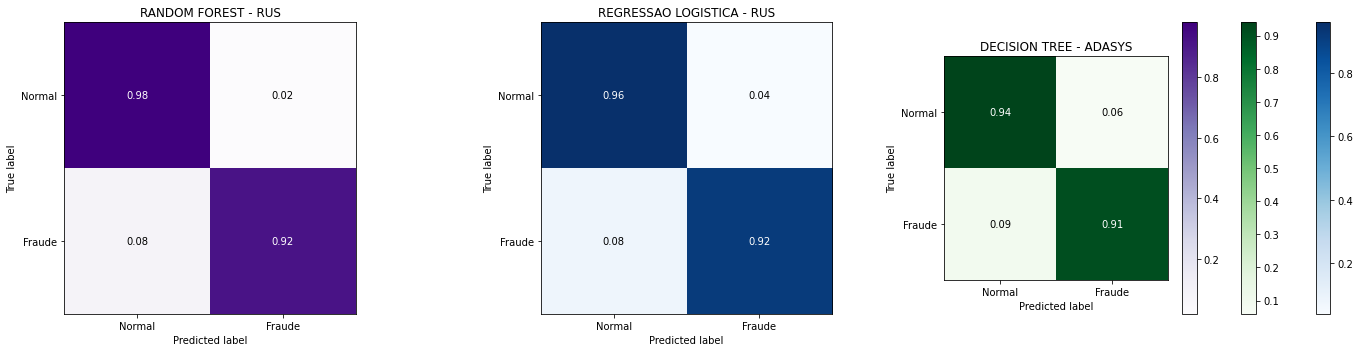

In [ ]:
from scikitplot.metrics import confusion_matrix
import sklearn
from matplotlib import colorbar


fig, ax = plt.subplots(1, 3,figsize=(20,5))

skplt.metrics.plot_confusion_matrix(y_val, y_pred_rus, normalize=True, title='REGRESSAO LOGISTICA - RUS', ax=ax[1])
skplt.metrics.plot_confusion_matrix(y_val, y_pred_tree_ada, normalize=True, title='DECISION TREE - ADASYS',ax=ax[2], cmap= plt.cm.Greens)
skplt.metrics.plot_confusion_matrix(y_val, y_pred_rf_rus, normalize=True, title='RANDOM FOREST - RUS',ax=ax[0], cmap= plt.cm.Purples)
ax[0].xaxis.set_ticklabels(['Normal', 'Fraude']); ax[0].yaxis.set_ticklabels(['Normal', 'Fraude']);
ax[1].xaxis.set_ticklabels(['Normal', 'Fraude']); ax[1].yaxis.set_ticklabels(['Normal', 'Fraude']);
ax[2].xaxis.set_ticklabels(['Normal', 'Fraude']); ax[2].yaxis.set_ticklabels(['Normal', 'Fraude']);

plt.tight_layout();

Acima temos documentados as confusion matrix de cada modelo escolhido. Percebemos que todos eles apresentam aproximadamente o mesmo percentual de falsos negativos, acertando em 92% praticamento para todos eles as transações de fraude.

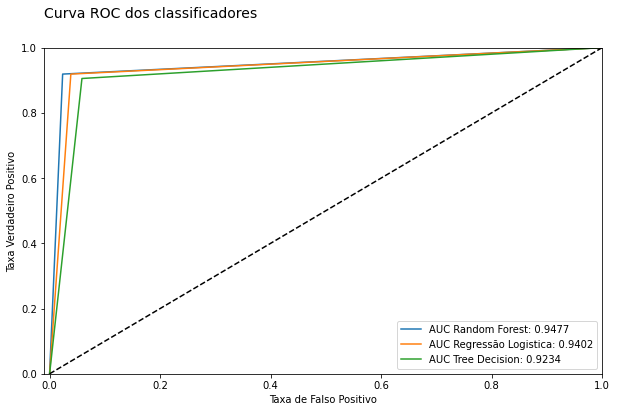

In [ ]:
log_fpr, log_tpr, log_thresold = roc_curve(y_val, y_pred_rus)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_val, y_pred_tree_ada)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_val, y_pred_rf_rus)

plt.figure(figsize=(10,6))
plt.title('Curva ROC dos classificadores', loc='left', fontsize=14, pad=30)
plt.plot(rf_fpr, rf_tpr, label='AUC Random Forest: {:.4f}'.format(roc_auc_score(y_val, y_pred_rf_rus)))
plt.plot(log_fpr, log_tpr, label='AUC Regressão Logistica: {:.4f}'.format(roc_auc_score(y_val,y_pred_rus)))
plt.plot(tree_fpr, tree_tpr, label='AUC Tree Decision: {:.4f}'.format(roc_auc_score(y_val, y_pred_tree_ada)))
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa Verdadeiro Positivo')
plt.legend()
plt.show()

Por fim, plotamos acima um gráfico da curva ROC - AUC dos classificadores, onde é possível que o modelo de random forest apresenta uma métrica ligeiramente superior as outras.

Após realizadas as análises das métricas e analisarmos os plots acima, concluímos, portanto, que os melhores resultados são do algoritmo de Random Forest! Dando continuidade ao nosso projeto vamos aplicar nosso modelo aos dados efetivos de testes.

#5 - Avaliação final do modelo

Nessa fase, é preciso avaliar os resultados e levantar todas as possibilidades de variações que os dados possam ter, analisando se existe algum fator que tenha sido negligenciado e até que ponto o modelo atende aos objetivos do negócio. Devemos sumarizar os resultados em termos de critérios de sucesso definidos no início do projeto. O resultado do modelo deve ser satisfatório tecnicamente e para as necessidades do negócio.

Agora que já exploramos e preparamos os dados, instaciamos o modelo e fizemos previsões no conjunto de validação, é hora de descobrirmos o potencial do nosso modelo com os dados de teste. Lembrando que nossa base de testes não pode ter os dados balanceados pois haveria perda. Nosso modelo precisa ser tratado mas precisamos fazer previsões em todas as linhas que ele receber. Os dados que foram padronizados devem permanecer dessa forma.

In [ ]:
# verificando os dados da base X_test
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaler,Time_Scaler
266885,-0.954627,0.219972,0.295416,-1.305846,-0.594507,-0.525255,0.755640,-0.394709,-0.242593,0.621651,...,-0.734037,-1.602293,0.449268,-0.321309,-1.352129,-1.053435,-0.471523,0.306774,0.054495,1.425856
210604,1.974093,-0.155826,-1.657830,0.501763,0.169663,-1.294675,0.588817,-0.472335,0.328636,0.067341,...,0.007331,0.134338,0.032160,0.059198,0.153311,0.557011,-0.102009,-0.067119,-0.113584,0.910548
182943,-0.800653,1.072119,0.553027,0.768991,1.089571,-0.135424,1.485738,-0.175636,-1.205373,-0.159685,...,0.102018,0.353101,-0.579067,-0.376136,1.125618,-0.192662,-0.086891,0.053693,-0.123140,0.648145
148878,-0.399491,-0.358049,-0.633650,-0.434360,2.051700,-0.963242,-0.006577,-0.139024,1.530306,-0.315488,...,-0.260283,-0.390383,0.151077,-1.157636,-2.185388,-0.158187,0.293719,0.262083,-0.313289,-0.095516
47025,-0.707372,0.331930,2.092645,-0.372892,-0.146356,0.504038,0.490801,0.251828,0.617614,-0.454615,...,-0.066619,0.248343,-0.159005,0.032952,-0.094265,0.360542,0.153711,-0.062161,-0.195625,-1.090208


**Random Forest - Random Under Sampling**

Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.9998    0.9762    0.9879     42648
           1     0.0602    0.8784    0.1127        74

    accuracy                         0.9761     42722
   macro avg     0.5300    0.9273    0.5503     42722
weighted avg     0.9982    0.9761    0.9863     42722

AUC: 0.9273	

Recall:		0.8784
Acurácia:	0.9761
Precisão:	0.0602
F1-Score:	0.9761


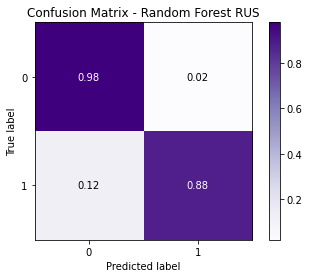

In [ ]:
# Fazer previsões em cima dos dados de validacao
y_pred_rf_rus = rf_rus.predict(X_test)

# Plotar matriz de confusão 
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf_rus, normalize=True, title='Confusion Matrix - Random Forest RUS', cmap= plt.cm.Purples)

# Imprimir relatório de classificação
print('Relatório de Classificação: \n', classification_report(y_test, y_pred_rf_rus, digits=4))

# Imprimir a Área sob Curva
print('AUC: {:.4f}\t\n'.format(roc_auc_score(y_test, y_pred_rf_rus)))

print(f'Recall:\t\t{recall_score(y_test, y_pred_rf_rus, pos_label=1):0.4f}')
print(f'Acurácia:\t{accuracy_score(y_test, y_pred_rf_rus):0.4f}')
print(f'Precisão:\t{precision_score(y_test, y_pred_rf_rus, zero_division=0):0.4f}')
print(f'F1-Score:\t{f1_score(y_test, y_pred_rf_rus, average="micro"):0.4f}')

Conforme plotado acima, após aplicação em nossa base de testes verificamos que nosso modelo **classifica corretamente 88%** das fraudes realizadas em transações bancárias. Embora a métrica seja um pouco menor que a encontrada com os dados de validação, podemos considerar como um bom resultado. A métrica de F1-score permanece em 0.97 e a curva ROC - AUC foi de 0.9273, ligeiramente menor que a apurada no modelo de validação.

Evidentemente esse resultado pode até ser melhorado, se utilizarmos técnicas mais avançadas, ou se incluirmos mais registros. Mas, para uma abordagem inicial de modelagem de Machine Learning, pode ser considerado um bom número.

# Conclusão

Como podemos ver, diferente de outros projetos já realizados, nosso dataset não possui valores ausentes e não foi nescessário fazer um limpeza dos dados. Apesar disso, foi necessários ajustar balanceamento e padronização dos dados antes de aplicar ao nosso modelo. Parace simples, mas não é. Pode-se dizer que em um trabalho de machine learning a obtenção e a preparação dos dados é umas das etapas que mais demanda tempo e cuidado.

A avaliação das métricas de diversos modelos também é uma etapa importante. Cada algoritmo possui suas características e aplicações próprias e é primordial analisar qual tem uma melhor aderência ao problema, apresentando melhores métricas desejadas.

Sobre o nosso modelo final, podemos dizer que o resultado apresentado é satisfatório. Evidente que pode ser melhorado, com utilização de outras técnicas um pouco mais avançadas.